# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [3]:
genome_ids = ['NA20359', 'NA19713', 'NA20342', 'NA20289', 'NA19982', 'NA20281', 'NA19703', 'NA19711', 'NA20351', 'NA19712', 'NA20317', 'NA19818', 'NA19923', 'NA19921', 'NA20126', 'NA20357', 'NA20294', 'NA19819', 'NA20298', 'NA19917', 'NA20340', 'NA20314', 'NA19701', 'NA20346', 'NA19834', 'NA19908', 'NA20412', 'NA20282', 'NA19835', 'NA20356', 'NA20348', 'NA19707', 'NA19900', 'NA19984', 'NA20127', 'NA20339', 'NA19916', 'NA19904', 'NA19909', 'NA20287', 'NA20278', 'NA20332', 'NA20276', 'NA19920', 'NA19625', 'NA20334', 'NA20291', 'NA20299', 'NA19922', 'NA19901', 'NA20296', 'NA19914', 'NA19704', 'NA19700']

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [5]:
root_dir = join(Path.home(),"cp_als/populations")

In [6]:
infile = join(root_dir,"output/ASW/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/ASW/all.csv'

In [7]:
df = pd.read_csv(infile)

In [8]:
df = df[genome_ids + ['gene']]
df.head()

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA20334,NA20291,NA20299,NA19922,NA19901,NA20296,NA19914,NA19704,NA19700,gene
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,TARDBP
3,0,1,1,1,0,1,1,1,1,1,...,0,1,0,1,1,0,1,1,0,TARDBP
4,0,1,1,1,0,1,1,1,1,1,...,0,1,0,1,1,0,1,1,0,TARDBP


## Computer variant count per gene and per genome

In [9]:
sdf=df.groupby(["gene"]).sum()

In [10]:
sdf.head()

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA19625,NA20334,NA20291,NA20299,NA19922,NA19901,NA20296,NA19914,NA19704,NA19700
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,17,43,22,19,7,6,45,40,21,8,...,7,20,3,6,5,44,29,20,54,2
ANG,5,7,4,5,4,5,13,8,0,4,...,10,6,3,5,0,11,0,11,3,10
ATXN2,9,162,9,10,12,160,7,15,161,168,...,155,154,158,12,160,28,164,156,171,12
C19ORF12,50,16,5,4,16,18,13,20,18,17,...,1,20,19,13,18,13,53,51,17,15
C9ORF72,0,18,36,11,5,27,31,22,23,13,...,7,17,33,13,17,28,21,13,11,24


## Compute mean99

In [11]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [12]:
mean99.head()

,0
NA20359,19.727273
NA19713,25.434343
NA20342,21.121212
NA20289,22.494949
NA19982,23.202020


In [13]:
m99 = mean99.transpose()

In [14]:
m99

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA19625,NA20334,NA20291,NA20299,NA19922,NA19901,NA20296,NA19914,NA19704,NA19700
0,19.727273,25.434343,21.121212,22.494949,23.20202,19.363636,22.060606,17.272727,24.080808,22.888889,...,21.969697,21.474747,24.141414,16.060606,19.464646,22.272727,22.343434,22.636364,23.171717,18.666667


## Name the row "mean99" to append to the dataframe 

In [15]:
m99.index=["mean99"]

In [16]:
m99.head()

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA19625,NA20334,NA20291,NA20299,NA19922,NA19901,NA20296,NA19914,NA19704,NA19700
mean99,19.727273,25.434343,21.121212,22.494949,23.20202,19.363636,22.060606,17.272727,24.080808,22.888889,...,21.969697,21.474747,24.141414,16.060606,19.464646,22.272727,22.343434,22.636364,23.171717,18.666667


## Compute statistics per genome, across all genes

In [17]:
genome_stats= sdf.describe()

In [18]:
genome_stats.head()

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA19625,NA20334,NA20291,NA20299,NA19922,NA19901,NA20296,NA19914,NA19704,NA19700
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000
mean,54.250000,69.944444,58.083333,61.861111,63.805556,53.250000,60.666667,47.500000,66.222222,62.944444,...,60.416667,59.055556,66.388889,44.166667,53.527778,61.25000,61.444444,62.250000,63.722222,51.333333
std,188.110207,243.582540,219.170954,238.496739,230.654450,195.985477,213.901847,149.129187,212.257406,223.870108,...,208.966487,209.003752,221.951253,151.154698,180.982002,207.94455,219.007038,207.383478,219.312121,150.647555
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.750000,4.000000,4.000000,2.750000,4.000000,5.000000,3.750000,4.000000,4.750000,...,2.750000,4.750000,3.000000,2.750000,4.000000,5.75000,1.750000,3.000000,3.000000,4.000000


### Adding new rows for genomes to show variant statistics

In [19]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [20]:
genome_stats_df

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA19625,NA20334,NA20291,NA20299,NA19922,NA19901,NA20296,NA19914,NA19704,NA19700
ALS2,17.000000,43.000000,22.000000,19.000000,7.000000,6.000000,45.000000,40.000000,21.000000,8.000000,...,7.000000,20.000000,3.000000,6.000000,5.000000,44.000000,29.000000,20.000000,54.000000,2.000000
ANG,5.000000,7.000000,4.000000,5.000000,4.000000,5.000000,13.000000,8.000000,0.000000,4.000000,...,10.000000,6.000000,3.000000,5.000000,0.000000,11.000000,0.000000,11.000000,3.000000,10.000000
ATXN2,9.000000,162.000000,9.000000,10.000000,12.000000,160.000000,7.000000,15.000000,161.000000,168.000000,...,155.000000,154.000000,158.000000,12.000000,160.000000,28.000000,164.000000,156.000000,171.000000,12.000000
C19ORF12,50.000000,16.000000,5.000000,4.000000,16.000000,18.000000,13.000000,20.000000,18.000000,17.000000,...,1.000000,20.000000,19.000000,13.000000,18.000000,13.000000,53.000000,51.000000,17.000000,15.000000
C9ORF72,0.000000,18.000000,36.000000,11.000000,5.000000,27.000000,31.000000,22.000000,23.000000,13.000000,...,7.000000,17.000000,33.000000,13.000000,17.000000,28.000000,21.000000,13.000000,11.000000,24.000000
CHCHD10,4.000000,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,3.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000
CHMP2B,4.000000,17.000000,4.000000,2.000000,6.000000,3.000000,5.000000,8.000000,4.000000,5.000000,...,4.000000,17.000000,3.000000,9.000000,9.000000,5.000000,2.000000,17.000000,3.000000,18.000000
CHRNA3,12.000000,21.000000,19.000000,30.000000,17.000000,21.000000,29.000000,16.000000,22.000000,14.000000,...,15.000000,29.000000,15.000000,16.000000,6.000000,21.000000,38.000000,18.000000,25.000000,31.000000
CREST,55.000000,46.000000,79.000000,4.000000,106.000000,4.000000,79.000000,90.000000,87.000000,62.000000,...,87.000000,55.000000,79.000000,14.000000,81.000000,138.000000,108.000000,81.000000,64.000000,112.000000
DAO,0.000000,2.000000,4.000000,10.000000,0.000000,11.000000,14.000000,5.000000,10.000000,6.000000,...,2.000000,7.000000,26.000000,3.000000,12.000000,20.000000,13.000000,2.000000,8.000000,26.000000


### Compute per gene stats

In [21]:
gene_df = sdf.transpose().describe()

In [22]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,54.0,21.222222,15.352053,1.0,8.00,19.0,28.00,61.0
ANG,54.0,6.685185,3.970761,0.0,4.00,6.0,10.00,16.0
ATXN2,54.0,100.925926,73.666728,5.0,12.00,154.5,161.00,175.0
C19ORF12,54.0,18.648148,12.309158,1.0,13.00,16.0,19.00,53.0
C9ORF72,54.0,18.759259,9.249039,0.0,12.25,17.0,24.00,36.0
CHCHD10,54.0,2.222222,1.003140,0.0,1.25,2.0,3.00,4.0
CHMP2B,54.0,8.092593,5.349197,2.0,4.00,6.5,10.75,22.0
CHRNA3,54.0,19.074074,8.591026,0.0,15.00,18.5,24.75,38.0
CREST,54.0,74.055556,36.506612,0.0,55.00,77.5,102.00,146.0


In [23]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [24]:
rdf.head()

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA19704,NA19700,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,17,43,22,19,7,6,45,40,21,8,...,54,2,54.0,21.222222,15.352053,1.0,8.00,19.0,28.0,61.0
ANG,5,7,4,5,4,5,13,8,0,4,...,3,10,54.0,6.685185,3.970761,0.0,4.00,6.0,10.0,16.0
ATXN2,9,162,9,10,12,160,7,15,161,168,...,171,12,54.0,100.925926,73.666728,5.0,12.00,154.5,161.0,175.0
C19ORF12,50,16,5,4,16,18,13,20,18,17,...,17,15,54.0,18.648148,12.309158,1.0,13.00,16.0,19.0,53.0
C9ORF72,0,18,36,11,5,27,31,22,23,13,...,11,24,54.0,18.759259,9.249039,0.0,12.25,17.0,24.0,36.0


In [25]:
rdf

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA19704,NA19700,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,17,43,22,19,7,6,45,40,21,8,...,54,2,54.0,21.222222,15.352053,1.0,8.00,19.0,28.00,61.0
ANG,5,7,4,5,4,5,13,8,0,4,...,3,10,54.0,6.685185,3.970761,0.0,4.00,6.0,10.00,16.0
ATXN2,9,162,9,10,12,160,7,15,161,168,...,171,12,54.0,100.925926,73.666728,5.0,12.00,154.5,161.00,175.0
C19ORF12,50,16,5,4,16,18,13,20,18,17,...,17,15,54.0,18.648148,12.309158,1.0,13.00,16.0,19.00,53.0
C9ORF72,0,18,36,11,5,27,31,22,23,13,...,11,24,54.0,18.759259,9.249039,0.0,12.25,17.0,24.00,36.0
CHCHD10,4,3,2,3,3,4,1,3,2,2,...,3,3,54.0,2.222222,1.003140,0.0,1.25,2.0,3.00,4.0
CHMP2B,4,17,4,2,6,3,5,8,4,5,...,3,18,54.0,8.092593,5.349197,2.0,4.00,6.5,10.75,22.0
CHRNA3,12,21,19,30,17,21,29,16,22,14,...,25,31,54.0,19.074074,8.591026,0.0,15.00,18.5,24.75,38.0
CREST,55,46,79,4,106,4,79,90,87,62,...,64,112,54.0,74.055556,36.506612,0.0,55.00,77.5,102.00,146.0


# Plot bar chart of total variant counts per gene


In [26]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [27]:
gdf=df.groupby(["gene"]).count()

In [28]:
gdf

,POS
gene,
ALS2,305
ANG,51
ATXN2,470
C19ORF12,130
C9ORF72,171
CHCHD10,15
CHMP2B,103
CHRNA3,134
CREST,377


In [29]:
gdf.reset_index(inplace=True)

In [30]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [31]:
gdf

,gene,variant_count
0,ERBB4,7370
1,NEK1,1113
2,FIG4,698
3,SETX,549
4,SPG11,533
5,ATXN2,470
6,ELP3,467
7,CREST,377
8,ALS2,305
9,VAPB,280


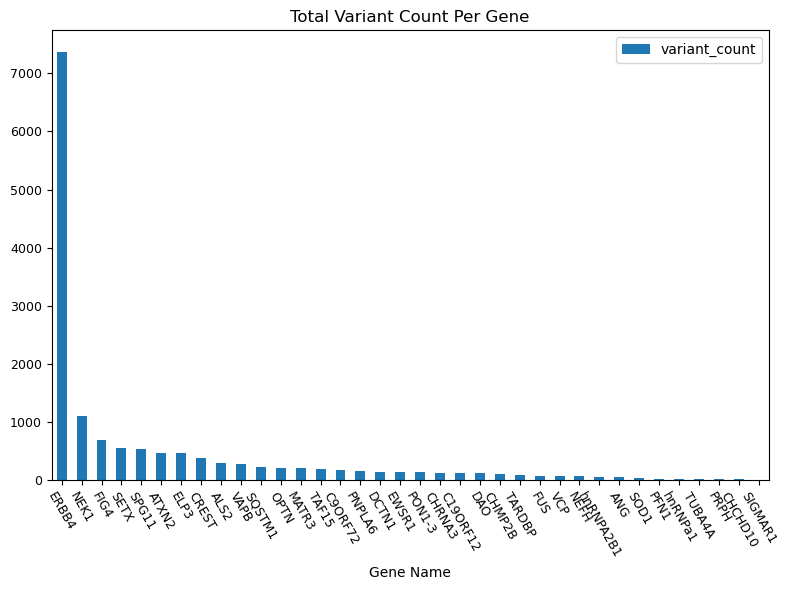

In [32]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [33]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'SETX', 'SPG11']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [34]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [35]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [36]:
hdf.reset_index(inplace=True)

In [37]:
hdf.head()

,index,count
0,NA20359,1953
1,NA19713,2518
2,NA20342,2091
3,NA20289,2227
4,NA19982,2297


In [38]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(2083.425925925926), 322.05616537303996)

## Find top and bottom genomes using mean & STD

In [39]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [40]:
len(top_genomes)

6

In [41]:
len(bottom_genomes)

7

In [42]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [43]:
sdf.head()

,NA20359,NA19713,NA20342,NA20289,NA19982,NA20281,NA19703,NA19711,NA20351,NA19712,...,NA19625,NA20334,NA20291,NA20299,NA19922,NA19901,NA20296,NA19914,NA19704,NA19700
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,17,43,22,19,7,6,45,40,21,8,...,7,20,3,6,5,44,29,20,54,2
ANG,5,7,4,5,4,5,13,8,0,4,...,10,6,3,5,0,11,0,11,3,10
ATXN2,9,162,9,10,12,160,7,15,161,168,...,155,154,158,12,160,28,164,156,171,12
C19ORF12,50,16,5,4,16,18,13,20,18,17,...,1,20,19,13,18,13,53,51,17,15
C9ORF72,0,18,36,11,5,27,31,22,23,13,...,7,17,33,13,17,28,21,13,11,24


In [44]:
tgdf= sdf.loc[top_genes]

In [45]:
tgdf_top_genomes = tgdf[top_genomes]

In [46]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [47]:
tgdf_top_genomes.head()

,NA19713,NA19818,NA20340,NA19916,NA20276,NA19920
gene,,,,,,
ERBB4,1466,1286,1459,1300,1335,1421
NEK1,208,230,196,227,223,255
FIG4,69,115,92,101,95,57
SETX,47,72,67,59,27,51
SPG11,122,81,8,118,143,133


In [48]:
tgdf_bot_genomes.head()

,NA19711,NA19819,NA20314,NA20412,NA20278,NA20332,NA20299
gene,,,,,,,
ERBB4,892,820,263,787,956,730,896
NEK1,186,223,14,213,226,190,209
FIG4,73,77,52,65,71,99,57
SETX,29,66,5,65,24,20,6
SPG11,5,4,4,106,7,8,111


## Plot stacked bar chart for top genes & top genomes

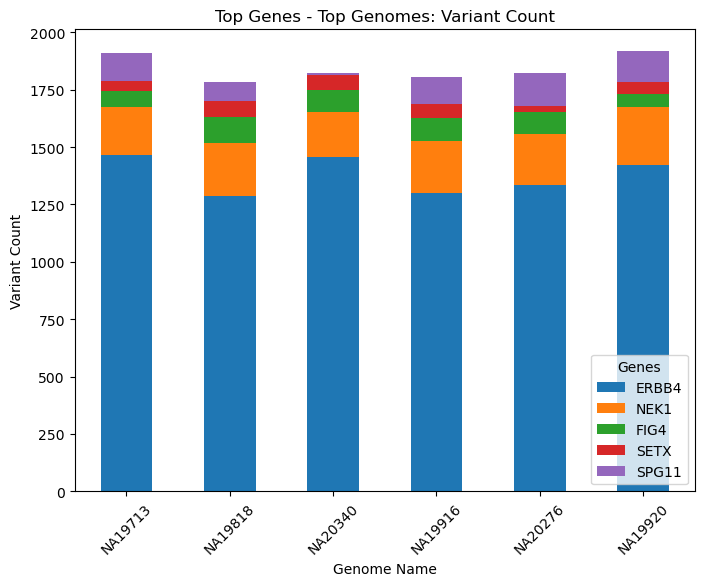

In [49]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

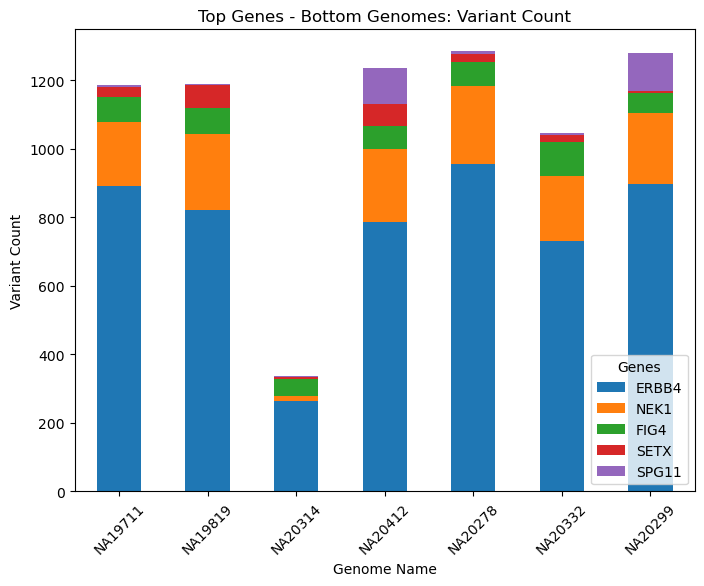

In [50]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()